In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
from PIL import Image

# 원본 이미지 디렉토리와 저장할 디렉토리 설정
input_dir = 'LSDSQ_480_gray'  # 원본 이미지들이 있는 폴더 경로
output_dir = 'LSDSQ_240_gray'  # 리사이즈된 이미지를 저장할 폴더 경로

# 출력 폴더가 존재하지 않으면 생성
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 이미지 크기 조정 함수
def resize_image(image_path, output_path):
    with Image.open(image_path) as img:
        width, height = img.size
        
        # 이미지의 세로가 480이고 높이가 854 또는 853인지 확인
        if height == 480:
            # 높이를 절반으로 줄이고, 너비를 비율에 맞게 조정
            new_height = 240
            new_width = int(width * new_height / height)
            
            # 이미지 리사이즈
            resized_img = img.resize((new_width, new_height))
            
            # 리사이즈된 이미지 저장
            resized_img.save(output_path)

# 디렉토리 내 모든 파일 처리
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # 지원하는 이미지 포맷
        input_path = os.path.join(input_dir, filename)
        output_path = os.path.join(output_dir, filename)
        
        # 이미지 리사이즈
        resize_image(input_path, output_path)

print("이미지 리사이즈 완료!")

이미지 리사이즈 완료!


: 

In [2]:
import os
import sys

sys.path.append(os.getcwd())
sys.path.append(os.getcwd()+'/taming')

In [3]:
import torch
import torchvision
from matplotlib import pyplot as plt
from omegaconf import OmegaConf
import random

In [4]:
loaded = torch.load("/home/jongmin/userdata/ocr-vqgan-latent-score/logs/2024-08-17T17-14-17_480_f32_c16384_d256_EMAVQGAN_disc_noocr/checkpoints/epoch=0128-step=0243645-val_rec_loss=1.937.ckpt")

In [9]:
loaded.keys()

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'callbacks', 'optimizer_states', 'lr_schedulers'])

In [22]:
ocrkeys = []
for key in loaded['state_dict'].keys():
  if 'ocr' in key:
    print(key)
    

In [20]:
ocrkeys

['loss.ocr_perceptual_loss.scaling_layer.scale',
 'loss.ocr_perceptual_loss.craft.basenet.slice1.0.weight',
 'loss.ocr_perceptual_loss.craft.basenet.slice1.0.bias',
 'loss.ocr_perceptual_loss.craft.basenet.slice1.1.weight',
 'loss.ocr_perceptual_loss.craft.basenet.slice1.1.bias',
 'loss.ocr_perceptual_loss.craft.basenet.slice1.1.running_mean',
 'loss.ocr_perceptual_loss.craft.basenet.slice1.1.running_var',
 'loss.ocr_perceptual_loss.craft.basenet.slice1.1.num_batches_tracked',
 'loss.ocr_perceptual_loss.craft.basenet.slice1.3.weight',
 'loss.ocr_perceptual_loss.craft.basenet.slice1.3.bias',
 'loss.ocr_perceptual_loss.craft.basenet.slice1.4.weight',
 'loss.ocr_perceptual_loss.craft.basenet.slice1.4.bias',
 'loss.ocr_perceptual_loss.craft.basenet.slice1.4.running_mean',
 'loss.ocr_perceptual_loss.craft.basenet.slice1.4.running_var',
 'loss.ocr_perceptual_loss.craft.basenet.slice1.4.num_batches_tracked',
 'loss.ocr_perceptual_loss.craft.basenet.slice1.7.weight',
 'loss.ocr_perceptual_loss

In [21]:
for key in ocrkeys:
  loaded['state_dict'].pop(key)

In [23]:
torch.save(loaded, "/home/jongmin/userdata/ocr-vqgan-latent-score/logs/2024-08-17T17-14-17_480_f32_c16384_d256_EMAVQGAN_disc_noocr/checkpoints/epoch=0128-step=0243645-val_rec_loss=1.937.ckpt")

In [4]:
from taming.models.vqgan import VQModel

In [5]:
conf = OmegaConf.load('configs/ocr-vqgan-f32-c16384-d256.yaml')

In [6]:
nn_params = conf.model.get("params", dict())
nn_params

{'embed_dim': 256, 'n_embed': 16384, 'ddconfig': {'double_z': False, 'z_channels': 256, 'resolution': 256, 'in_channels': 1, 'out_ch': 1, 'ch': 128, 'ch_mult': [1, 1, 2, 2, 2, 4], 'num_res_blocks': 2, 'attn_resolutions': [16], 'dropout': 0.0}, 'lossconfig': {'target': 'taming.modules.losses.vqperceptual.VQLPIPSWithDiscriminatorOCR', 'params': {'disc_conditional': False, 'disc_in_channels': 1, 'disc_start': 100000, 'disc_weight': 0.75, 'disc_num_layers': 2, 'codebook_weight': 1.0, 'perceptual_weight': 0.2, 'ocr_perceptual_weight': 1.0}}}

In [7]:
res = nn_params['ddconfig']['resolution']
res

256

In [8]:
img = torchvision.io.read_image('LSDSQ_480_gray/_5l1XynrMbc:0000:98.png')
img = img.unsqueeze(0).float().cuda()
img.shape

torch.Size([1, 1, 480, 854])

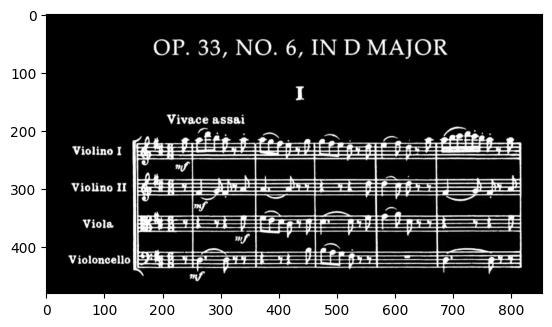

In [9]:
plt.imshow(img.cpu().squeeze(),cmap='Greys')

In [28]:
i = Image.open('LSDSQ_480_gray/_5l1XynrMbc:0000:98.png')
i.mode

'L'

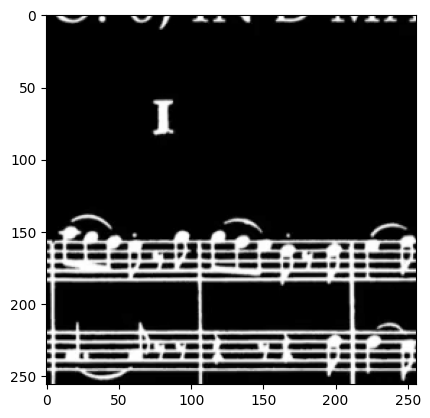

In [10]:
wid = random.randint(0,img.shape[-2]-res)
hei = random.randint(0,img.shape[-1]-res)
square_img = img[...,wid:wid+res,hei:hei+res]
plt.imshow(square_img.cpu().squeeze(),cmap='Greys')

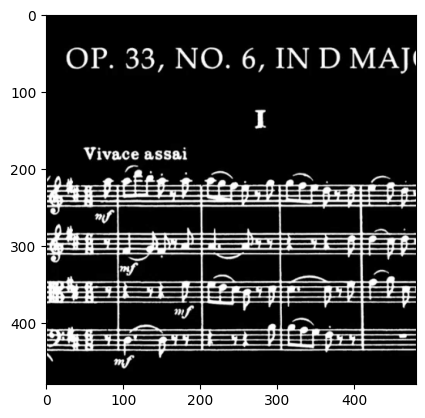

In [11]:
wid = random.randint(0,img.shape[-2]-480)
hei = random.randint(0,img.shape[-1]-480)
square_480_img = img[...,wid:wid+480,hei:hei+480]
plt.imshow(square_480_img.cpu().squeeze(),cmap='Greys')

370 809
torch.Size([1, 1, 32, 32])


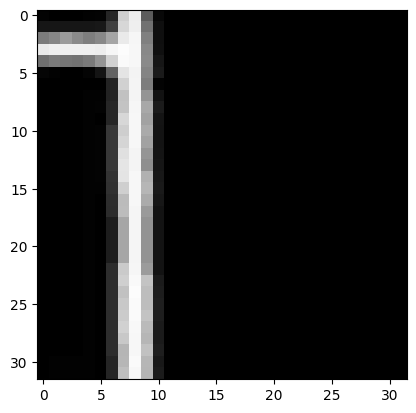

In [12]:
code_size = 2**5
wid = random.randint(0,img.shape[-2]-code_size)
hei = random.randint(0,img.shape[-1]-code_size)
print(wid,hei)
code_img = img[...,wid:wid+code_size,hei:hei+code_size]
print(code_img.shape)
plt.imshow(code_img.cpu().squeeze(),cmap='Greys',vmin=0,vmax=255)

In [13]:
vqmodel = VQModel(**nn_params).cuda()

Working with z of shape (1, 256, 8, 8) = 16384 dimensions.


/home/jongmin/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jongmin/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth


/home/jongmin/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading craft model from taming/modules/autoencoder/ocr_perceptual/craft_mlt_25k.pth
VQLPIPSWithDiscriminator running with hinge loss.


In [14]:
out, diff = vqmodel(img)
out.shape, diff

(torch.Size([1, 1, 480, 832]),
 tensor(0.0403, device='cuda:0', grad_fn=<AddBackward0>))

In [16]:
out, diff = vqmodel(square_480_img)
out.shape, diff

(torch.Size([1, 1, 480, 480]),
 tensor(0.0401, device='cuda:0', grad_fn=<AddBackward0>))

In [15]:
quant, emb_loss, info = vqmodel.encode(img)
quant.shape, emb_loss, info[2].shape, quant.shape[-2]*quant.shape[-1]

(torch.Size([1, 256, 15, 26]),
 tensor(0.0403, device='cuda:0', grad_fn=<AddBackward0>),
 torch.Size([390]),
 390)

In [19]:
quant, emb_loss, info = vqmodel.encode(square_img)
quant.shape, emb_loss, info[2].shape, quant.shape[-2]*quant.shape[-1]

(torch.Size([1, 256, 16, 16]),
 tensor(0.0506, device='cuda:0', grad_fn=<AddBackward0>),
 torch.Size([256]),
 256)

In [20]:
480/30, 854/53

(16.0, 16.11320754716981)

### VQMODEL CONFIG TEST

In [13]:
nn_params_m = nn_params.copy()

In [14]:
nn_params_m['ddconfig']['ch_mult']=[1,1,1,2,2,4]
nn_params_m['ddconfig']['resolution']=128

In [15]:
vqmodel_m = VQModel(**nn_params_m).cuda()

Working with z of shape (1, 256, 4, 4) = 4096 dimensions.


/home/jongmin/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jongmin/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth


/home/jongmin/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading craft model from taming/modules/autoencoder/ocr_perceptual/craft_mlt_25k.pth
VQLPIPSWithDiscriminator running with hinge loss.


In [16]:
out, diff = vqmodel_m(img)
out.shape, diff

(torch.Size([1, 1, 480, 832]),
 tensor(0.0468, device='cuda:0', grad_fn=<AddBackward0>))

In [68]:
32*26, 856/32

832

In [20]:
h = vqmodel_m.encoder(img)
h.shape

torch.Size([1, 256, 15, 26])

In [21]:
hh = vqmodel_m.quant_conv(h)
hh.shape

torch.Size([1, 256, 15, 26])

In [22]:
quant, emb_loss, info = vqmodel_m.encode(img)
quant.shape, emb_loss, info[2].shape, quant.shape[-2]*quant.shape[-1]

(torch.Size([1, 256, 15, 26]),
 tensor(0.0468, device='cuda:0', grad_fn=<AddBackward0>),
 torch.Size([390]),
 390)

In [23]:
img.shape[-2] / quant.shape[-2]

32.0

In [26]:
quant, emb_loss, info = vqmodel_m.encode(square_img)
quant.shape, emb_loss, info[2].shape, quant.shape[-2]*quant.shape[-1]

(torch.Size([1, 256, 8, 8]),
 tensor(0.0450, device='cuda:0', grad_fn=<AddBackward0>),
 torch.Size([64]),
 64)

In [29]:
quant, emb_loss, info = vqmodel_m.encode(square_480_img)
quant.shape, emb_loss, info[2].shape, quant.shape[-2]*quant.shape[-1]

(torch.Size([1, 256, 15, 15]),
 tensor(0.0463, device='cuda:0', grad_fn=<AddBackward0>),
 torch.Size([225]),
 225)

## MODEL LOAD TEST

In [2]:
from taming.models.vqgan import EMAVQ
from omegaconf import OmegaConf
import torch

In [3]:
conf = OmegaConf.load('logs/2024-11-04T04-52-24_Olimpic_grandstaff_flattened_112_f16_c16384_d256_EMAVQ/configs/2024-11-04T04-52-24-project.yaml')
nn_params = conf.model.get("params", dict())

In [4]:
nn_params

{'embed_dim': 256, 'n_embed': 16384, 'ddconfig': {'double_z': False, 'z_channels': 256, 'resolution': 256, 'in_channels': 1, 'out_ch': 1, 'ch': 128, 'ch_mult': [1, 1, 2, 2, 4], 'num_res_blocks': 2, 'attn_resolutions': [16], 'dropout': 0.0}, 'lossconfig': {'target': 'taming.modules.losses.vqperceptual.VQLPIPSWithDiscriminatorOCR', 'params': {'disc_conditional': False, 'disc_in_channels': 1, 'disc_start': 1000000, 'disc_weight': 0.75, 'disc_num_layers': 2, 'codebook_weight': 1.0, 'perceptual_weight': 0.2, 'ocr_perceptual_weight': 1.0}}, 'monitor': 'val/rec_loss_epoch'}

In [5]:
model = EMAVQ(**nn_params)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


/home/jongmin/.local/share/virtualenvs/ocr-vqgan-latent-score-XY2xU5-Y/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jongmin/.local/share/virtualenvs/ocr-vqgan-latent-score-XY2xU5-Y/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth


/home/jongmin/.local/share/virtualenvs/ocr-vqgan-latent-score-XY2xU5-Y/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading craft model from taming/modules/autoencoder/ocr_perceptual/craft_mlt_25k.pth
VQLPIPSWithDiscriminator running with hinge loss.


In [84]:
# model.load_state_dict(torch.load('/home/sake/userdata/sake/ocr-vqgan-latent-score/logs/gsocremavq_16_128_gray_unfit/2024-11-04T04-52-24_Olimpic_grandstaff_flattened_112_f16_c16384_d256_EMAVQ/checkpoints/last.ckpt')['state_dict'], strict=False)
model.load_state_dict(torch.load('logs/2024-11-04T04-52-24_Olimpic_grandstaff_flattened_112_f16_c16384_d256_EMAVQ/checkpoints/last.ckpt')['state_dict'], strict=False)

<All keys matched successfully>

In [85]:
# token_path = "/home/sake/userdata/olimpic_dataset/grandstaff-lmx/beethoven/piano-sonatas/sonata17-3/maj2_down_m-33-36:gsocremavq_16_128_gray_unfit_shifted/maj2_down_m-33-36:gsocremavq_16_128_gray_unfit_shifted:0_0.pt"
token_path = "/home/jongmin/userdata/grandstaff-lmx/chopin/mazurkas/mazurka-50/maj2_down_m-0-5:gsocremavq_16_128_gray_unfit_shifted/maj2_down_m-0-5:gsocremavq_16_128_gray_unfit_shifted:0_0.pt"

In [86]:
from pathlib import Path
image_path = (Path(token_path).parent.parent / (Path(token_path).stem.split(':')[0] + "_128")).with_suffix('.jpg')
# image_path = "/home/jongmin/userdata/ocr-vqgan-latent-score/Olimpic_grandstaff_128_gray/scarlatti-d_keyboard-sonatas_L523K205_original_m-155-160.jpg"
image_path

PosixPath('/home/jongmin/userdata/grandstaff-lmx/chopin/mazurkas/mazurka-50/maj2_down_m-0-5_128.jpg')

In [87]:
loaded = torch.load(token_path)

In [88]:
loaded.shape

torch.Size([1, 8, 21])

In [130]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torchvision
tf = torchvision.transforms.ToTensor()

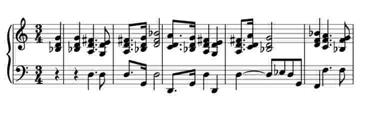

In [131]:
i = Image.open(image_path)
i

In [132]:
np.array(i).shape

(128, 366)

torch.Size([1, 128, 366])


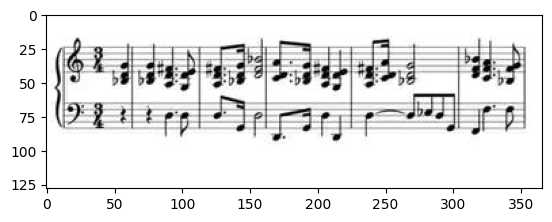

In [184]:
img = tf(i)
print(img.shape)
img = img.to(torch.float32)*2.0 - 1.0
plt.imshow(img.cpu().squeeze(), cmap='gray')

In [185]:
img.min(), img.max()

(tensor(-1.), tensor(1.))

In [189]:
img = img[:112]

In [191]:
img.float().cpu().unsqueeze(0).shape

torch.Size([1, 1, 128, 366])

torch.Size([1, 8, 22])
torch.Size([1, 1, 128, 352])


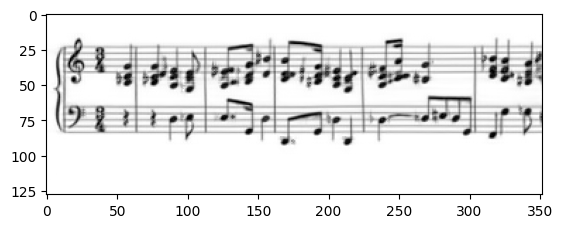

In [193]:
with torch.no_grad():
  encoded = model.cpu().encode(img.float().cpu().unsqueeze(0))
  tokens = encoded[2][2].view(encoded[0].shape[0],encoded[0].shape[-2],encoded[0].shape[-1])
  print(tokens.shape)
  decoded_ = model.decode_code(tokens)
  print(decoded_.shape)
  plt.imshow(decoded_.cpu().detach().numpy().squeeze(),cmap='gray', vmin=-1.0, vmax=1.0)

In [172]:
decoded_.min(), decoded_.max()

(tensor(-1.2354), tensor(1.2168))

torch.Size([1, 256, 8, 22])
torch.Size([1, 1, 128, 352])


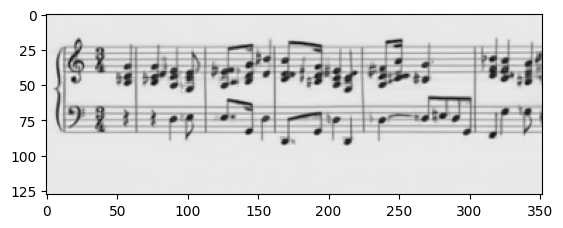

In [173]:
with torch.no_grad():
  encoded = model.cpu().encode(img.float().cpu().unsqueeze(0))
  print(encoded[0].shape)
  decoded_ = model.decode(encoded[0])
  print(decoded_.shape)
  plt.imshow(decoded_.cpu().detach().numpy().squeeze(),cmap='gray')

torch.Size([1, 8, 21])
torch.Size([1, 1, 128, 336])


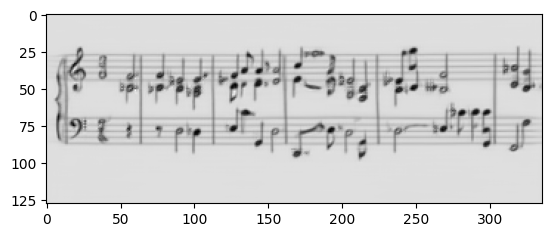

In [121]:
with torch.no_grad():
  print(loaded.shape)
  decoded = model.cpu().decode_code(loaded.cpu())
  print(decoded.shape)
plt.imshow(decoded.cpu().detach().numpy().squeeze(),cmap='gray')